# Fit dati del libro

Siccome la Fra è simpatica e dobbiamo fare dei fit per trovarci lo spessore dell'oro senza dover fare ogni volta cambi di laboratorio ci ha chiesto di fare un fit dei dati...
Stefano alla chiamata risponde dicendo, vaffanculo facciamo.

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial
import pandas as pd
import scipy.interpolate as interpolate

%matplotlib inline
# c = scipy.c # light speed, may be needed for a conversion
# hbar = scipy.hbar # hbar... may be needed for a conversion


In [33]:
df = pd.read_csv("./data/book_data/Tabella_1.csv", sep=";")
df.head()

,eV,cm^-1,Angstrom,exp_lenght,n,k,exp_k
0,"9,919.00",0.0,1.25,-10.0,0.999972,2.39,-6.0
1,"9,184.00",0.0,1.35,-10.0,0.999966,3.13,-6.0
2,"8,551.00",0.0,1.45,-10.0,0.999961,4.02,-6.0
3,"8,266.00",0.0,1.50,-10.0,0.999958,4.52,-6.0
4,"7,085.00",0.0,1.75,-10.0,0.999942,7.78,-6.0


In [34]:
df["lambda_corrected"] = df['Angstrom'] * 10 ** df["exp_lenght"]
df["k_corrected"] = df['k'] * 10 ** df["exp_k"]
df.head()

,eV,cm^-1,Angstrom,exp_lenght,n,k,exp_k,lambda_corrected,k_corrected
0,"9,919.00",0.0,1.25,-10.0,0.999972,2.39,-6.0,1.250000e-10,0.000002
1,"9,184.00",0.0,1.35,-10.0,0.999966,3.13,-6.0,1.350000e-10,0.000003
2,"8,551.00",0.0,1.45,-10.0,0.999961,4.02,-6.0,1.450000e-10,0.000004
3,"8,266.00",0.0,1.50,-10.0,0.999958,4.52,-6.0,1.500000e-10,0.000005
4,"7,085.00",0.0,1.75,-10.0,0.999942,7.78,-6.0,1.750000e-10,0.000008


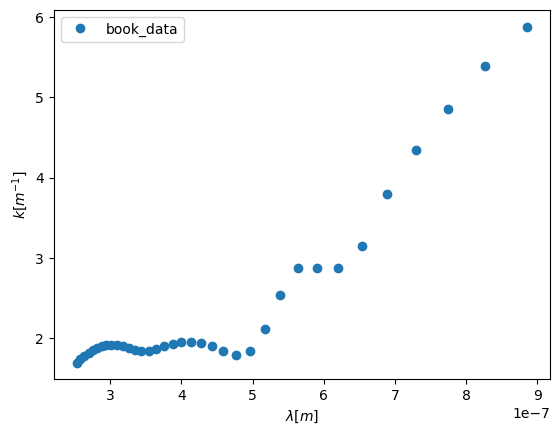

In [35]:
plt.plot("lambda_corrected", "k_corrected", "o", data=df[(df["lambda_corrected"]<900e-9) & (df["lambda_corrected"] > 250e-9)], label= "book_data" )
plt.xlabel(r"$\lambda [m]$")
plt.ylabel(r"$k [m^{-1}]$")
plt.legend()

/home/pilo/anaconda3/envs/codeLab/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


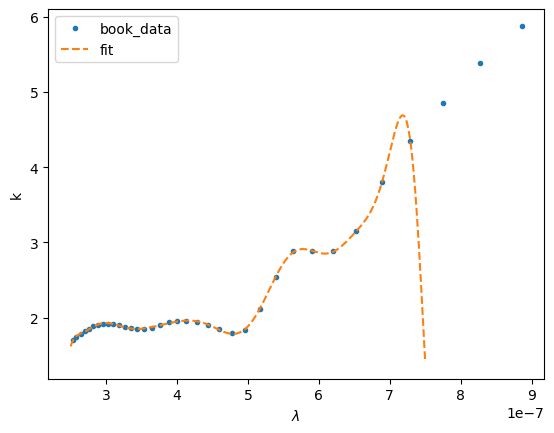

In [36]:
filter = (df["lambda_corrected"]<900e-9) & (df["lambda_corrected"] > 250e-9)
coeff= np.polyfit(df[filter]["lambda_corrected"], df[filter]["k_corrected"], deg=26)
fun = np.poly1d(coeff)

# x = df[filter]["lambda_corrected"]
x = np.linspace(250e-9, 750e-9, 500)

plt.plot("lambda_corrected", "k_corrected", ".", data=df[filter], label= "book_data")
plt.plot(x, fun(x), "--", label="fit")
plt.ylabel("k")
plt.xlabel(r"$\lambda$")
plt.legend()

## Simuliamo spettro

Ora  che abbiamo uno spettro dell'oro funzionante facciamo una simulazione dello spettro dell'oro
Usiamo dati raccolti in precedenza per fare un confronto, usando anche lo spessore dichiarato dalla microbilancia.

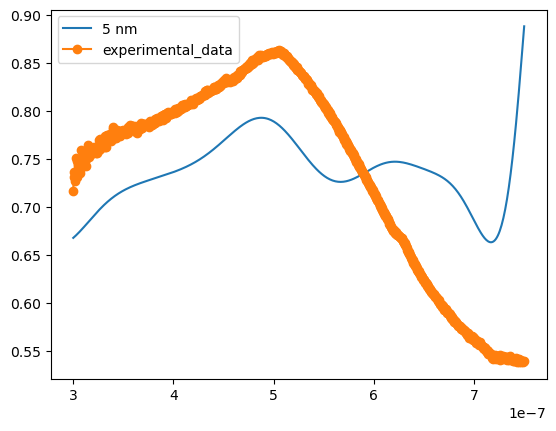

In [37]:
def hypotetical_fun(x : float, fit : callable, spessore : float) -> float:
    return np.exp(- 4. * np.pi *  fit(x) * spessore / x)

x = np.linspace(300e-9, 750e-9, 500)

spessore = 15e-6

data = pd.read_csv("./data/Pre-21-04/oro_4_04_ELABORATO.csv")

data["lambda"] = data["lambda"] * 1e-9

# plt.plot(x, hypotetical_fun(x, fun, spessore=60e-9), label = "60 nm")
plt.plot(x, hypotetical_fun(x, fun, spessore=5e-9), label = "5 nm")

plt.plot("lambda", "polished","-o", data=data[(data["lambda"]>300e-9) & (data["lambda"]<750e-9) ], label='experimental_data')

# plt.plot(x, fun(x), label = 'k')
plt.legend()



/home/pilo/anaconda3/envs/codeLab/lib/python3.11/site-packages/numpy/polynomial/polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


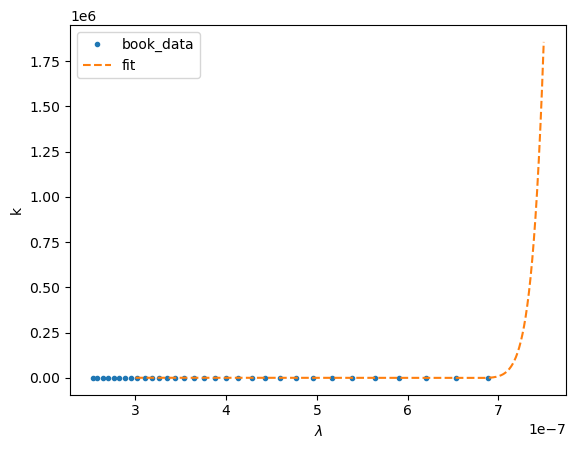

In [51]:
## Testing a New Numpy Class for fitting a Polynomial Series
# 
filter = (df["lambda_corrected"]<700e-9) & (df["lambda_corrected"] > 250e-9)

new_fit = Polynomial.fit(df[filter]["lambda_corrected"], df[filter]["k_corrected"],
                         deg=500,
                         domain=[250e-9, 900e-9])

plt.plot("lambda_corrected", "k_corrected", ".", data=df[filter], label= "book_data")
plt.plot(x, new_fit(x), "--", label="fit")
plt.ylabel("k")
plt.xlabel(r"$\lambda$")
plt.legend()

In [55]:
new_fit.coef.shape

(501,)